<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/IntroColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Google Colab(oratory)

**What?** Tool to write Python code (in the form of Jupyter notebooks)

**Where?** Directly in a browser, from any device (internet connection needed)

**Why?** Easy way to share code (just need a link), free use of GPUs (although in a limited amount of time a day), easy connection to Google Drive, Github..., pre-installed libraries

## Getting started:

1. Create a new notebook (need to be signed in with Google credentials): [colab.research.google.com](https://colab.research.google.com) 

2. Open an existing notebook, depending on where it is stored:  

  *   Locally on your computer: [colab.research.google.com](https://colab.research.google.com) $→$ File $→$ Upload Notebook $→$ Upload
  *   On Google Drive: [colab.research.google.com](https://colab.research.google.com) $→$ File $→$ Upload Notebook $→$ Google Drive (logged with the same credentials as Colab). Or directly from Google Drive: 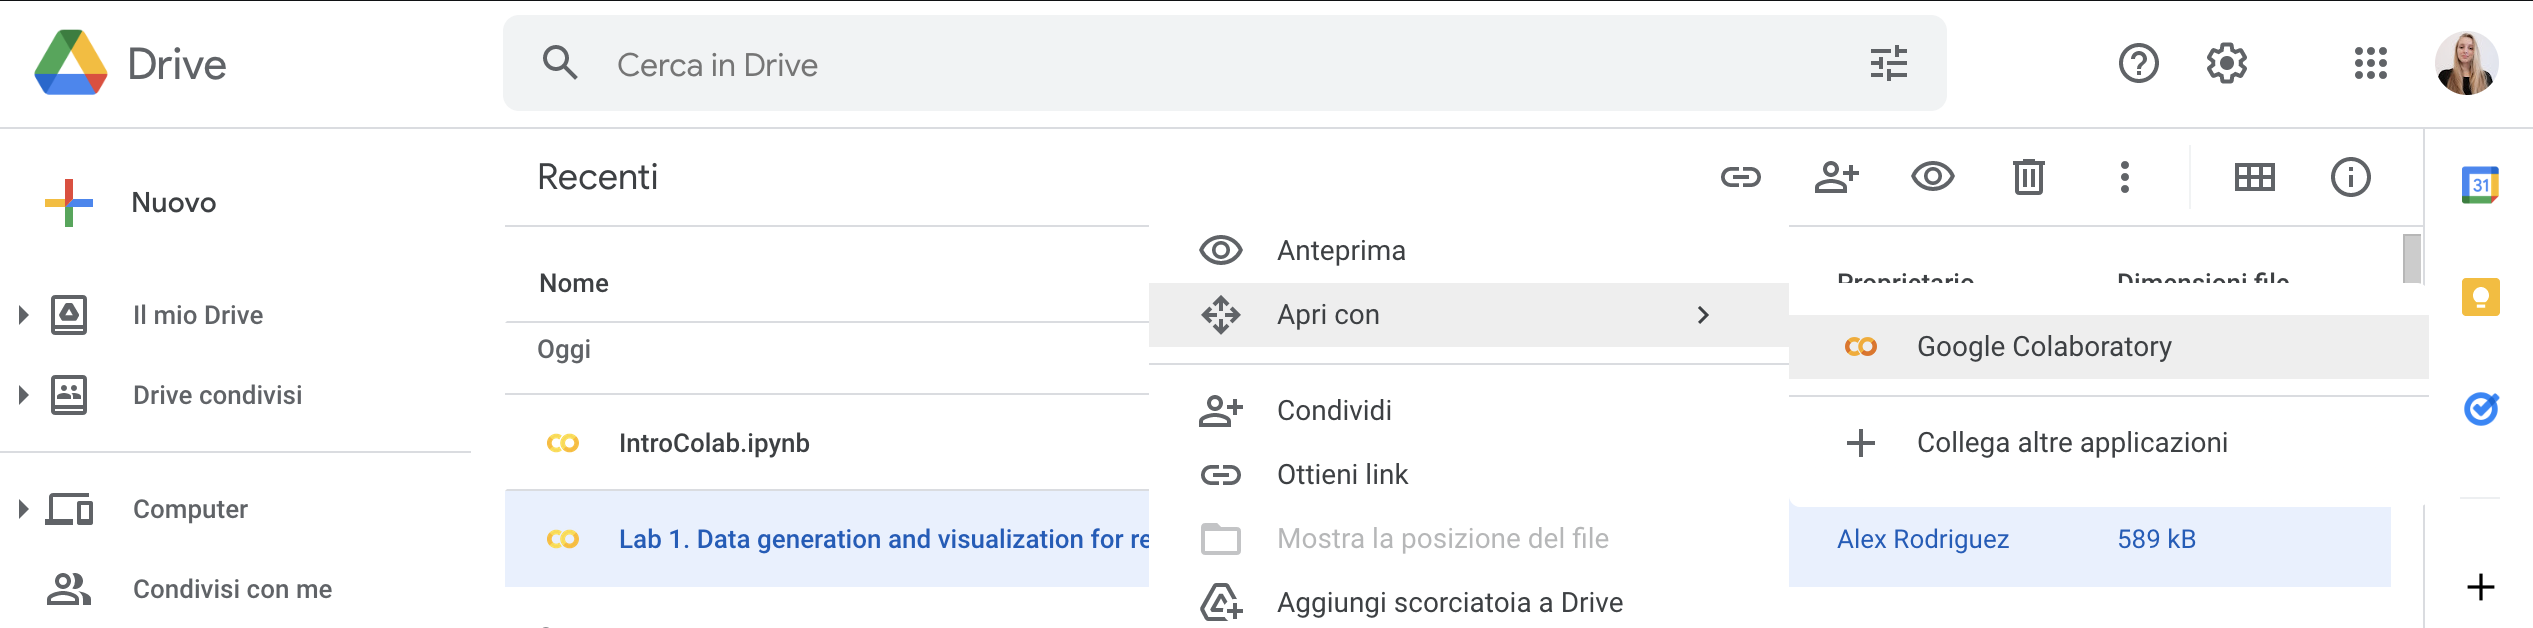

  * On Github: [colab.research.google.com](https://colab.research.google.com) $→$ File $→$ Open Notebook $→$ GitHub (insert Git credentials and possibly allow access to private repositories). Alternatively put a shortcut directly on the repo: 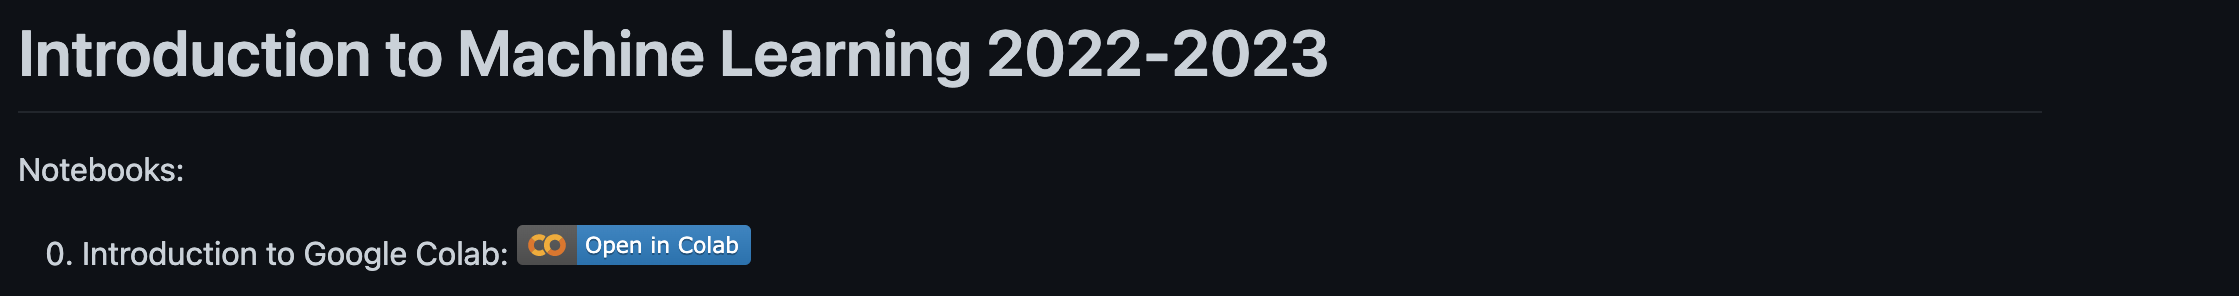 
  obtained using the markdown command (it works only if you already have a Colab link for your notebook): 
~~~
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](colab-link-to-your-notebook)
~~~

3. Save a notebook: 

  *   On Google Drive or GitHub: File $→$ Save a copy in Drive / Save a copy in GitHub
  *   Locally on your computer: File $→$ Download (as notebook .ipynb or as python file .py)

## Loading the data 

1. From Google Drive: 

  * first you need to mount your drive (some authentication might be 
required): 

    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```

  * then you can load your file containig the data (the default path to your drive is `/content/drive/MyDrive/`) using the appropriate method, for example for csv files:

    ```python
    import pandas as pd
    file_path = '/content/drive/MyDrive/name-of-your-csv'
    data = pd.read_csv(path)
    ```

  * once you have mounted your drive, all your files are visible in the following window: 

    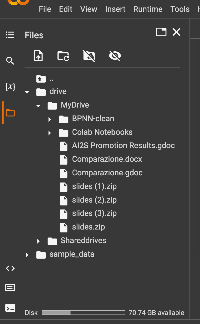

2. From your computer: 
  
  * choose the file to upload from your machine (`uploaded` is a dictionary and the name of the uploaded file is the key to retrieve its content):
    ```python
    from google.colab import files
    uploaded = files.upload()
    ```
  
  * load the data, for example, into a pandas data frame (or whataver data structure you need), using the `BytesIO` function:
  ```python
  import pandas as pd
  import io
  data = pd.read_csv(io.BytesIO(uploaded['name-of-your-file']))
  ```

3. From GitHub:

  * copy the link to the raw version of the dataset in GitHub by clicking `Raw`/`View Raw`:
  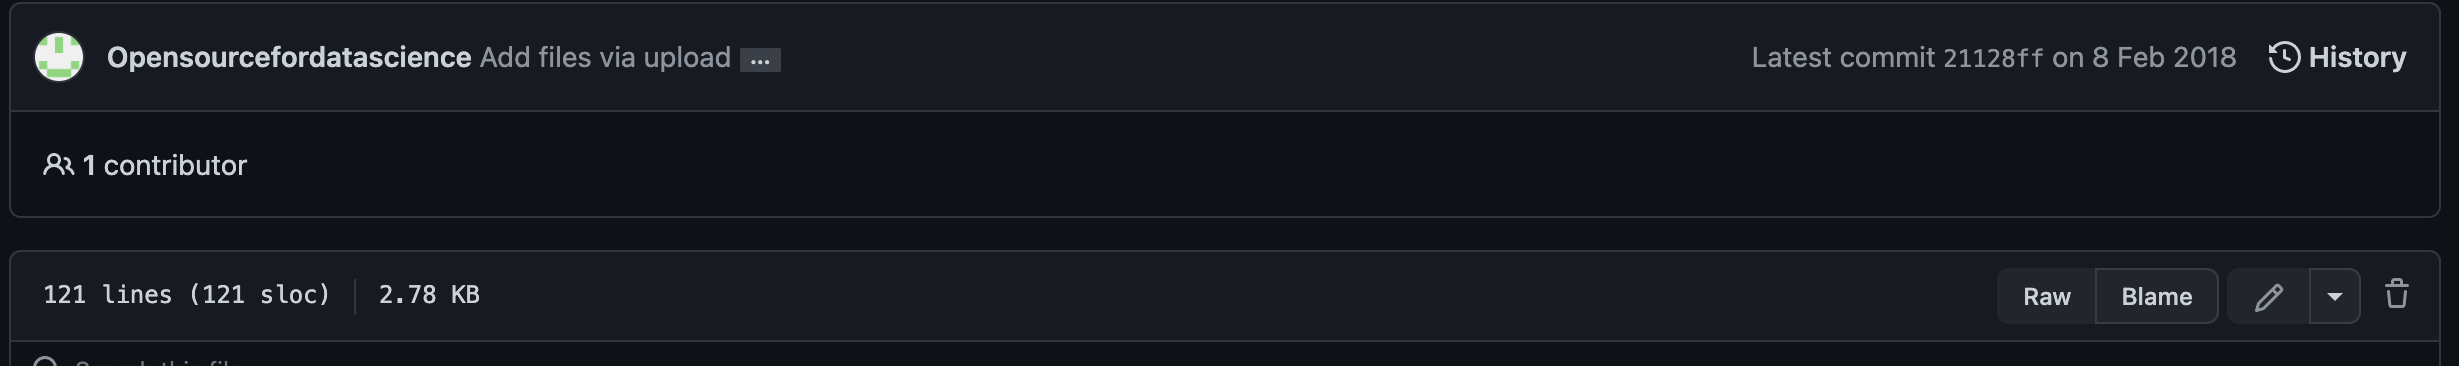

  * use this link as path of your file and proceed as before, for example if we want to load a csv into a pandas dataframe: 

    ```python
    import pandas as pd
    path = 'url-to-raw-github-dataset'
    data = pd.read_csv(path)
    ```

4. From the web, using the library `wget` (which stands for web-get), for example if we want data in csv format:
  ```shell
  !wget link-to-your-file -p directory-to-save-data
  ```


## Saving the data

1. On Google Drive (assuming your Drive is mounted as explained before), for example as a csv file:
```python
from google.colab import drive
saving_path = 'content/drive/MyDrive/name-of-output-csv-file'
with open(path, 'w', encoding='utf-8-sig') as f:
  data.to_csv(f)
```

2. On your computer, for example a csv file:
```python
from google.colab import files
data.to_csv('name-of-output-csv-file', encoding='utf-8-sig')
files.download('name-of-output-csv-file')
```

## Access a GitHub repository from Colab

**Disclaimer**: this should be done only when you need to access and work with several files inside a repository, if you only need to work on a single notebook, use the instruction already given before! 

1. If you don't need to push changes directly on git: 

  $→$ Clone the repository you need in Google Drive (assuming Drive is mounted and the repository is public): 
```shell
%cd drive/MyDrive/
!git clone https://link-to-your-repo.git
%cd name-of-your-repo
```

2. If you want to push/commit/... directly on git:

  * Generate the GitHub Access Token (do not share!) from your GitHub profile: Settings $→$ Developers settings $→$ Personal access tokens $→$ Generate new token

  * Connect to the remote repository with the following command:
    ```shell
    !git remote add origin https://{token}@github.com/username/repo-name.git
    ```
  * now you can use all the git commends, always with `!` at the beginning



## Share the Colab notebook

Just use `Share` button at the top right corner on Colab (different types of sharing available):

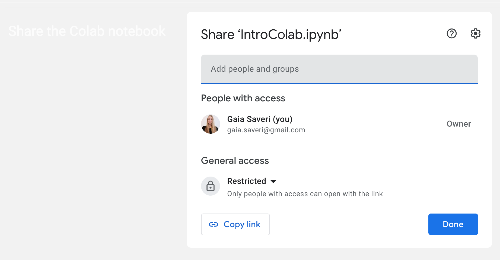
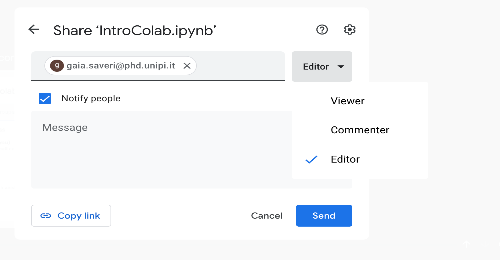

## Import or install Python libraries 

Most of the libraries you typically use for machine learning/data science are already installed in colab and just need to be imported as usual, for example:

In [ ]:
import pandas as pd 
import numpy as np
import scipy as sp
import torch

However, for some compatibility reason, you may need a different version w.r.t. the default:

In [ ]:
# check library's version 
print("Current version of numpy: ", np.__version__)
# install version that you need 
!pip install numpy==1.20

Remember to restart the runtime to have the libraries with the newly installed versions! 

In [ ]:
# after restarting the runtime
import numpy as np
print("Current version of numpy: ", np.__version__)

You can also install libraries which are not the default in Colab (always check the instruction in the library's documentation!):

In [ ]:
# this library is not currently installed
import httpie

In [ ]:
# install from git
!pip install git+https://github.com/jkbr/httpie.git

In [ ]:
# let's check again
import httpie

## Change runtime type

Google Colab offers the usage of their GPUs and TPUs for a limited amount of time a day (~12 hours). To enable this accelerators, just go to: Runtime $→$ Change runtime type 

**NB**: Inactivities are poorly tolerated, if you just let your code run without editing the notebook, execution will be stopped after ~2 hours (all changes to the notebook are saved, but computations are stopped, even if they are not finished)

## Miscellaneous

* Run python (.py) files in Colab: it often happens that you write your code locally on your computer and run it remotely in Colab, because you want to leverage its computing resources; probably your code will be written in a `.py` file and not in a notebook. What you can do is to acces this file via drive/git, change your current directory to the file's directory (using `%cd`), and execute the code as follows:
```shell
!python3 'name-of-your-py-file'
```

* Usage of `!` and `%` in Colab: both the exclamation mark and the percentage symbol are used for executing commands from the underlying operating system, however with `%` you can run *magic commands* from `IPython` ([list of magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html))
